In [10]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tabulate import tabulate
import yaml

%matplotlib inline

In [11]:
#values for csv importing
csv_opts = {'sep': '|',
           'quotechar': '"',
           #'compression': 'gzip',
           'encoding': 'utf-8'}

In [12]:
with open('../hand/removal_dtypes.yaml', 'r') as yamlfile:
        removal_dtypes = yaml.load(yamlfile, Loader=yaml.FullLoader)

In [13]:
#reading in CSV file
removals = pd.read_csv('../input/removals.csv', **csv_opts, dtype=removal_dtypes)

In [14]:
#putting date variables into m/d/y format
removals['apprehension_date'] = pd.to_datetime(removals['apprehension_date'], 
                                               format='%m/%d/%Y', errors='coerce')
removals['departed_date'] = pd.to_datetime(removals['departed_date'], format='%m/%d/%Y')
removals['removal_date'] = pd.to_datetime(removals['removal_date'], format='%m/%d/%Y')

# Overview

In [6]:
# overview of variables in arrests dataset
removals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963972 entries, 0 to 963971
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   aor                          963972 non-null  category      
 1   apprehension_date            949737 non-null  object        
 2   processing_disposition_code  958257 non-null  category      
 3   citizenship                  963972 non-null  category      
 4   gender                       963972 non-null  category      
 5   rc_threat_level              542478 non-null  object        
 6   final_charge_section         962328 non-null  category      
 7   departed_date                963972 non-null  datetime64[ns]
 8   removal_date                 963972 non-null  datetime64[ns]
 9   id                           963972 non-null  int64         
dtypes: category(5), datetime64[ns](2), int64(1), object(2)
memory usage: 42.3+ MB


In [17]:
# column heads of arrests dataset
removals.head()

,aor,apprehension_date,processing_disposition_code,citizenship,gender,rc_threat_level,final_charge_section,departed_date,removal_date,id
0,NOL,2015-08-26,ADMDPT,GUATEMALA,Male,(B)(7)(E),237a2Aiii,2015-10-01,2015-10-01,0
1,DAL,NaT,REINST,MEXICO,Male,(B)(7)(E),212a9Aii,2015-10-01,2015-10-01,1
2,DAL,2015-06-19,REINST,MEXICO,Male,(B)(7)(E),212a9CiII,2015-10-01,2015-10-01,2
3,SNA,2015-08-21,REINST,HONDURAS,Male,(B)(7)(E),212a9Aii,2015-10-01,2015-10-01,3
4,HOU,2015-09-28,REINST,MEXICO,Male,(B)(7)(E),212a9CiII,2015-10-01,2015-10-01,4


## Null Values

In [15]:
# creating table for null values of removals
# formatting added for commas and percent sign
null_table = [['Variable', 'NaN', '% Nan'], 
              ['AOR', 
               "{:,}".format(sum(pd.isnull(removals.aor))), 
               str(round(sum(pd.isnull(removals.aor)) / len(removals) * 100, 2)) +'%'], 
              ['Apprehension Date', 
               "{:,}".format(sum(pd.isnull(removals.apprehension_date))), 
               str(round(sum(pd.isnull(removals.apprehension_date)) / len(removals) * 100, 2)) +'%'], 
              ['Processing Disposition Code', 
               "{:,}".format(sum(pd.isnull(removals.processing_disposition_code))), 
               str(round(sum(pd.isnull(removals.processing_disposition_code)) / len(removals) * 100, 2)) +'%'], 
              ['Citizenship', 
               "{:,}".format(sum(pd.isnull(removals.citizenship))), 
               str(round(sum(pd.isnull(removals.citizenship)) / len(removals) * 100, 2)) +'%'],
              ['Gender', 
               "{:,}".format(sum(pd.isnull(removals.gender))), 
               str(round(sum(pd.isnull(removals.gender)) / len(removals) * 100, 2)) +'%'],
              ['RC Threat Level', 
               "{:,}".format(sum(pd.isnull(removals.rc_threat_level))), 
               str(round(sum(pd.isnull(removals.rc_threat_level)) / len(removals) * 100, 2)) +'%'],
              ['Final Charge Section', 
               "{:,}".format(sum(pd.isnull(removals.final_charge_section))), 
               str(round(sum(pd.isnull(removals.final_charge_section)) / len(removals) * 100, 2)) +'%'],
              ['Departed Date', 
               "{:,}".format(sum(pd.isnull(removals.departed_date))), 
               str(round(sum(pd.isnull(removals.departed_date)) / len(removals) * 100, 2)) +'%'],
              ['Removal Date', 
               "{:,}".format(sum(pd.isnull(removals.removal_date))), 
               str(round(sum(pd.isnull(removals.removal_date)) / len(removals) * 100, 2)) +'%'],
             ]

#print header and table of null values
print('')
print('Null values for Removals data (total = 963,972)')
print(tabulate(null_table, headers='firstrow', tablefmt='fancy_grid', 
               stralign='center', numalign='center'))


Null values for Removals data (total = 963,972)
╒═════════════════════════════╤═════════╤═════════╕
│          Variable           │   NaN   │  % Nan  │
╞═════════════════════════════╪═════════╪═════════╡
│             AOR             │    0    │  0.0%   │
├─────────────────────────────┼─────────┼─────────┤
│      Apprehension Date      │ 14,236  │  1.48%  │
├─────────────────────────────┼─────────┼─────────┤
│ Processing Disposition Code │  5,715  │  0.59%  │
├─────────────────────────────┼─────────┼─────────┤
│         Citizenship         │    0    │  0.0%   │
├─────────────────────────────┼─────────┼─────────┤
│           Gender            │    0    │  0.0%   │
├─────────────────────────────┼─────────┼─────────┤
│       RC Threat Level       │ 421,494 │ 43.72%  │
├─────────────────────────────┼─────────┼─────────┤
│    Final Charge Section     │  1,644  │  0.17%  │
├─────────────────────────────┼─────────┼─────────┤
│        Departed Date        │    0    │  0.0%   │
├──────────────

## Duplicates

The removals dataset includes no duplicate records.

In [6]:
duplicate = removals[removals.duplicated()]

In [8]:
len(duplicate)

0

# Apprehension Date

apprehension_date,1969-10-01 00:00:00,1970-10-01 00:00:00,1971-10-01 00:00:00,1972-10-01 00:00:00,1973-10-01 00:00:00,1974-10-01 00:00:00,1975-10-01 00:00:00,1976-10-01 00:00:00,1977-10-01 00:00:00,1978-10-01 00:00:00,1979-10-01 00:00:00,1980-10-01 00:00:00,1981-10-01 00:00:00,1982-10-01 00:00:00,1983-10-01 00:00:00,1984-10-01 00:00:00,1985-10-01 00:00:00,1986-10-01 00:00:00,1987-10-01 00:00:00,1988-10-01 00:00:00,1989-10-01 00:00:00,1990-10-01 00:00:00,1991-10-01 00:00:00,1992-10-01 00:00:00,1993-10-01 00:00:00,1994-10-01 00:00:00,1995-10-01 00:00:00,1996-10-01 00:00:00,1997-10-01 00:00:00,1998-10-01 00:00:00,1999-10-01 00:00:00,2000-10-01 00:00:00,2001-10-01 00:00:00,2002-10-01 00:00:00,2003-10-01 00:00:00,2004-10-01 00:00:00,2005-10-01 00:00:00,2006-10-01 00:00:00,2007-10-01 00:00:00,2008-10-01 00:00:00,2009-10-01 00:00:00,2010-10-01 00:00:00,2011-10-01 00:00:00,2012-10-01 00:00:00,2013-10-01 00:00:00,2014-10-01 00:00:00,2015-10-01 00:00:00,2016-10-01 00:00:00,2017-10-01 00:00:00,2018-10-01 00:00:00
aor,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SNA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,4,3,1,4,2,5,6,18,15,7,12,17,21,72,60,17,31,69,113,189,308,444,744,"5,051","73,840","53,758","62,225","50,227"
PHO,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,3,1,0,0,1,6,1,4,3,6,5,18,15,15,28,23,37,40,48,87,135,214,328,390,491,634,706,"3,557","22,072","18,769","26,701","25,166"
SND,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,6,1,2,6,5,7,5,4,9,4,14,5,7,12,14,19,32,33,65,83,96,163,178,"1,680","23,573","20,440","26,611","19,333"
ELP,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,1,4,5,7,3,8,24,12,20,24,22,29,32,51,53,68,138,239,408,503,778,"1,204","1,643","8,627","37,106","18,296","21,195","13,682"
HOU,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,3,3,7,7,7,12,13,21,21,34,22,47,73,64,50,53,53,104,177,161,109,121,263,258,391,599,788,"1,264","3,640","14,428","11,320","15,250","11,630"
DAL,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,4,3,3,5,8,3,10,11,18,17,24,28,26,21,32,60,106,103,64,98,161,217,319,579,954,"1,862","4,917","11,197","12,399","12,536","8,102"
ATL,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,1,2,0,2,5,7,3,4,8,14,37,36,34,59,91,53,66,59,95,129,281,166,137,217,267,356,522,956,"1,359","1,900","2,944","6,100","10,231","10,982","7,046"
NOL,0,0,0,0,0,1,0,0,1,0,5,0,0,0,1,1,0,5,3,3,2,4,4,3,4,20,14,23,28,28,33,42,41,58,96,182,105,98,139,183,280,418,718,930,"1,374","2,310","5,384","7,821","8,524","6,737"
LOS,0,0,0,1,0,0,0,0,0,0,3,1,1,1,4,5,0,1,2,12,5,6,8,10,14,27,24,34,42,30,40,73,78,77,63,108,111,159,139,201,261,411,575,822,"1,068","1,506","6,422","6,647","6,304","5,125"


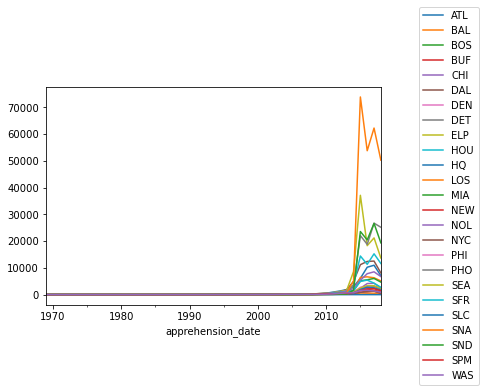

In [16]:
#create subset of data counting the number of apprehensions over time in each AOR
apprehension_by_fy = removals[["aor", "apprehension_date", "id"]]
apprehension_by_fy = apprehension_by_fy.groupby(["aor", "apprehension_date"], 
                                                as_index=False)['id'].count()

# pivot table so rows are dates and AORs are in columns
apprehension_by_fy = apprehension_by_fy.pivot(index='apprehension_date', 
                                              columns='aor', values='id')

# group by fiscal year
apprehension_by_fy = apprehension_by_fy.groupby(pd.Grouper(freq='AS-OCT')).sum()

# create plot of apprehensions over time
apprehension_by_fy.plot().legend(loc='center left',bbox_to_anchor=(1.1, 0.5))

# create transposed table of apprehensions over time
apprehension_by_fy.T.sort_values(by=["2018-10-01 00:00:00"], ascending=False).style.format("{:,.0f}")

# Processing Disposition

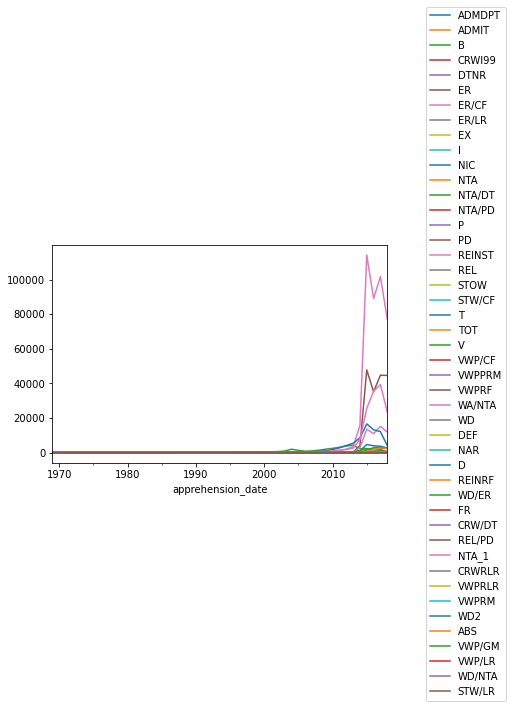

In [17]:
# create subset of removals with date, processing disposition and ID
removals_by_disposition = removals[["apprehension_date", "processing_disposition_code", "id"]]

# count the number of removals by each type of processing disposition and date
removals_by_disposition = removals_by_disposition.groupby(
    ["processing_disposition_code", "apprehension_date"], as_index=False)['id'].count()

# pivot df so that index is date and columns are processing disposition 
# (allows for easy groupby in next line of code)
removals_by_disposition = removals_by_disposition.pivot(
    index='apprehension_date', columns='processing_disposition_code', values='id')

# group by fiscal year
removals_by_disposition = removals_by_disposition.groupby(pd.Grouper(freq='AS-OCT')).sum()

# plot disposition types over time
removals_by_disposition.plot().legend(loc='center left',bbox_to_anchor=(1.1, 0.5))

In [18]:
# transpose table of transposed df to show disposition types over fiscal years
removals_by_disposition.transpose().sort_values(
    by=["2018-10-01 00:00:00"], ascending=False).style.format("{:,.0f}")

apprehension_date,1969-10-01 00:00:00,1970-10-01 00:00:00,1971-10-01 00:00:00,1972-10-01 00:00:00,1973-10-01 00:00:00,1974-10-01 00:00:00,1975-10-01 00:00:00,1976-10-01 00:00:00,1977-10-01 00:00:00,1978-10-01 00:00:00,1979-10-01 00:00:00,1980-10-01 00:00:00,1981-10-01 00:00:00,1982-10-01 00:00:00,1983-10-01 00:00:00,1984-10-01 00:00:00,1985-10-01 00:00:00,1986-10-01 00:00:00,1987-10-01 00:00:00,1988-10-01 00:00:00,1989-10-01 00:00:00,1990-10-01 00:00:00,1991-10-01 00:00:00,1992-10-01 00:00:00,1993-10-01 00:00:00,1994-10-01 00:00:00,1995-10-01 00:00:00,1996-10-01 00:00:00,1997-10-01 00:00:00,1998-10-01 00:00:00,1999-10-01 00:00:00,2000-10-01 00:00:00,2001-10-01 00:00:00,2002-10-01 00:00:00,2003-10-01 00:00:00,2004-10-01 00:00:00,2005-10-01 00:00:00,2006-10-01 00:00:00,2007-10-01 00:00:00,2008-10-01 00:00:00,2009-10-01 00:00:00,2010-10-01 00:00:00,2011-10-01 00:00:00,2012-10-01 00:00:00,2013-10-01 00:00:00,2014-10-01 00:00:00,2015-10-01 00:00:00,2016-10-01 00:00:00,2017-10-01 00:00:00,2018-10-01 00:00:00
processing_disposition_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
REINST,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,0,1,3,3,4,12,19,16,24,49,45,44,126,186,257,315,478,"1,029","2,034","3,317","15,728","114,171","89,060","101,704","77,072"
ER,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,5,4,3,4,3,8,9,12,19,45,51,122,273,378,"4,059","47,817","35,199","44,766","44,621"
WA/NTA,0,0,0,0,0,0,0,0,0,1,3,0,0,0,1,1,1,2,3,7,2,3,7,7,5,10,6,14,18,32,29,51,61,68,106,269,201,233,361,511,696,"1,053","1,543","1,828","2,619","7,646","25,504","35,561","39,306","23,565"
ER/CF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,6,4,2,7,9,23,28,39,108,238,"2,928","13,617","10,977","15,214","11,930"
T,0,0,1,0,0,0,1,1,1,0,12,1,1,1,4,10,1,3,7,18,16,25,22,26,44,68,65,106,119,178,135,147,134,170,204,326,330,370,492,821,"1,175","1,744","2,807","4,154","5,437","8,583","16,636","13,235","12,159","4,149"
ADMDPT,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3,2,1,5,6,12,10,14,18,26,12,18,33,87,178,138,186,170,284,338,390,995,"4,737","3,979","3,718","2,690"
V,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,3,2,1,4,3,5,7,6,7,16,3,4,1,10,5,11,102,"1,384","2,867","3,005","2,473"
REINRF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,2,1,2,3,0,1,4,17,19,22,707,"1,740","2,629","2,346"
NTA_1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,2,1,2,0,2,4,17,405,898


# Departed and Removal Date

These data appear to match the ICE ERO annual report removal numbers: https://www.ice.gov/sites/default/files/documents/Document/2017/localStats2017b.pdf

removal_date,2015-10-01 00:00:00,2016-10-01 00:00:00,2017-10-01 00:00:00,2018-10-01 00:00:00
aor,,,,
SNA,"72,597","55,313","62,363","57,190"
PHO,"21,984","20,786","26,899","31,232"
SND,"23,729","20,945","26,917","21,097"
ELP,"43,590","21,420","21,149","18,594"
HOU,"14,681","13,598","15,899","17,194"
DAL,"12,154","14,028","14,818","13,676"
ATL,"5,770","12,571","13,727","13,061"
NOL,"4,778","9,471","10,763","11,844"
MIA,"5,562","7,082","8,091","8,830"


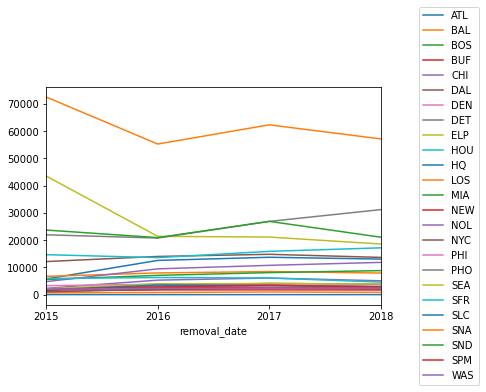

In [19]:
# create subset that counts the removals in each AOR over time
removals_by_fy = removals[["aor", "removal_date", "id"]]
removals_by_fy = removals_by_fy.groupby(["aor", "removal_date"], as_index=False)['id'].count()

# pivot table so dates are in rows and AOR is in columns
removals_by_fy = removals_by_fy.pivot(index='removal_date', columns='aor', values='id')

# group by fiscal year
removals_by_fy = removals_by_fy.groupby(pd.Grouper(freq='AS-OCT')).sum()

# create plot of removals over time
removals_by_fy.plot().legend(loc='center left',bbox_to_anchor=(1.1, 0.5))

# create transposed table of removals in each AOR by fiscal year
removals_by_fy.T.sort_values(by=["2018-10-01 00:00:00"], ascending=False).style.format("{:,.0f}")

departed_date,2014-10-01 00:00:00,2015-10-01 00:00:00,2016-10-01 00:00:00,2017-10-01 00:00:00,2018-10-01 00:00:00
aor,,,,,
SNA,909,"73,120","54,810","62,135","56,489"
PHO,826,"21,851","20,408","27,552","30,264"
SND,644,"23,833","20,611","26,818","20,782"
ELP,513,"43,698","21,007","21,373","18,162"
HOU,51,"14,779","13,555","16,018","16,969"
DAL,103,"12,204","14,025","14,747","13,597"
ATL,266,"5,762","12,422","13,756","12,923"
NOL,71,"4,769","9,482","10,804","11,730"
MIA,102,"5,560","7,122","8,211","8,570"


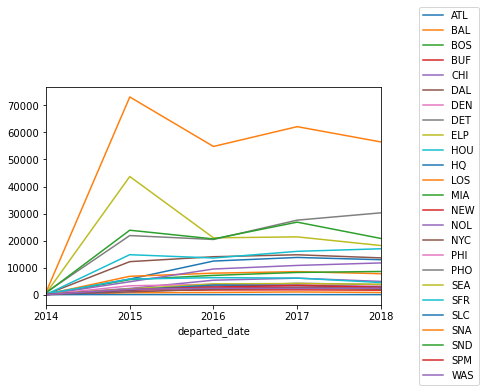

In [8]:
# create subset to count departed dates over time in each AOR
departed_by_fy = removals[["aor", "departed_date", "id"]]
departed_by_fy = departed_by_fy.groupby(
    ["aor", "departed_date"], as_index=False)['id'].count()

# pivot table so dates are in rows and AOR is in columns
departed_by_fy = departed_by_fy.pivot(index='departed_date', columns='aor', values='id')

# group by fiscal year
departed_by_fy = departed_by_fy.groupby(pd.Grouper(freq='AS-OCT')).sum()

# create plot of deaprted dates over time in each AOR
departed_by_fy.plot().legend(loc='center left',bbox_to_anchor=(1.1, 0.5))

# create transposed table of departed dates in AOR for each fiscal year
departed_by_fy.T.sort_values(by=["2018-10-01 00:00:00"], ascending=False).style.format("{:,.0f}")

# Citizenship

In [12]:
# create dataframe of removal frequency by citizenship
rem_cit = removals.citizenship.value_counts(normalize=True).to_frame()

# renames column header
rem_cit.columns = ["removals"]

# converts column to percent
rem_cit = rem_cit*100
rem_cit = rem_cit.round(decimals=2)
rem_cit = rem_cit.sort_values(by = ['removals'], ascending=False)
rem_cit = rem_cit.astype(str) + '%'

# displays results
rem_cit

,removals
MEXICO,55.44%
GUATEMALA,17.55%
HONDURAS,11.49%
EL SALVADOR,7.43%
DOMINICAN REPUBLIC,0.79%
...,...
NORWAY,0.0%
LIBYA,0.0%
PARAGUAY,0.0%
AUSTRIA,0.0%
